In [132]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv(r'C:\Learn_AI\Model\Wine_Quanity\Data\WineQT.csv')

In [134]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


### 📊 Wine Quality Dataset

#### 🔹 Input Variables (11 features):
1. **Fixed acidity** – Độ axit cố định  
2. **Volatile acidity** – Độ axit bay hơi  
3. **Citric acid** – Axit citric (giúp tăng vị tươi)  
4. **Residual sugar** – Đường dư (lượng đường còn lại sau lên men)  
5. **Chlorides** – Hàm lượng muối (chủ yếu là natri clorua)  
6. **Free sulfur dioxide** – Lưu huỳnh dioxit tự do (chống oxy hóa)  
7. **Total sulfur dioxide** – Tổng lưu huỳnh dioxit  
8. **Density** – Mật độ (liên quan đến độ cồn và đường)  
9. **pH** – Độ pH (độ chua)  
10. **Sulphates** – Sunphat (liên quan đến bảo quản & vị)  
11. **Alcohol** – Nồng độ cồn (%)

#### 🔸 Output Variable:
- **Quality (0–10)** – Chất lượng rượu (được chấm điểm cảm quan)


In [135]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [137]:
df.drop('Id' , axis = 1 , inplace = True)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [138]:
feature = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']

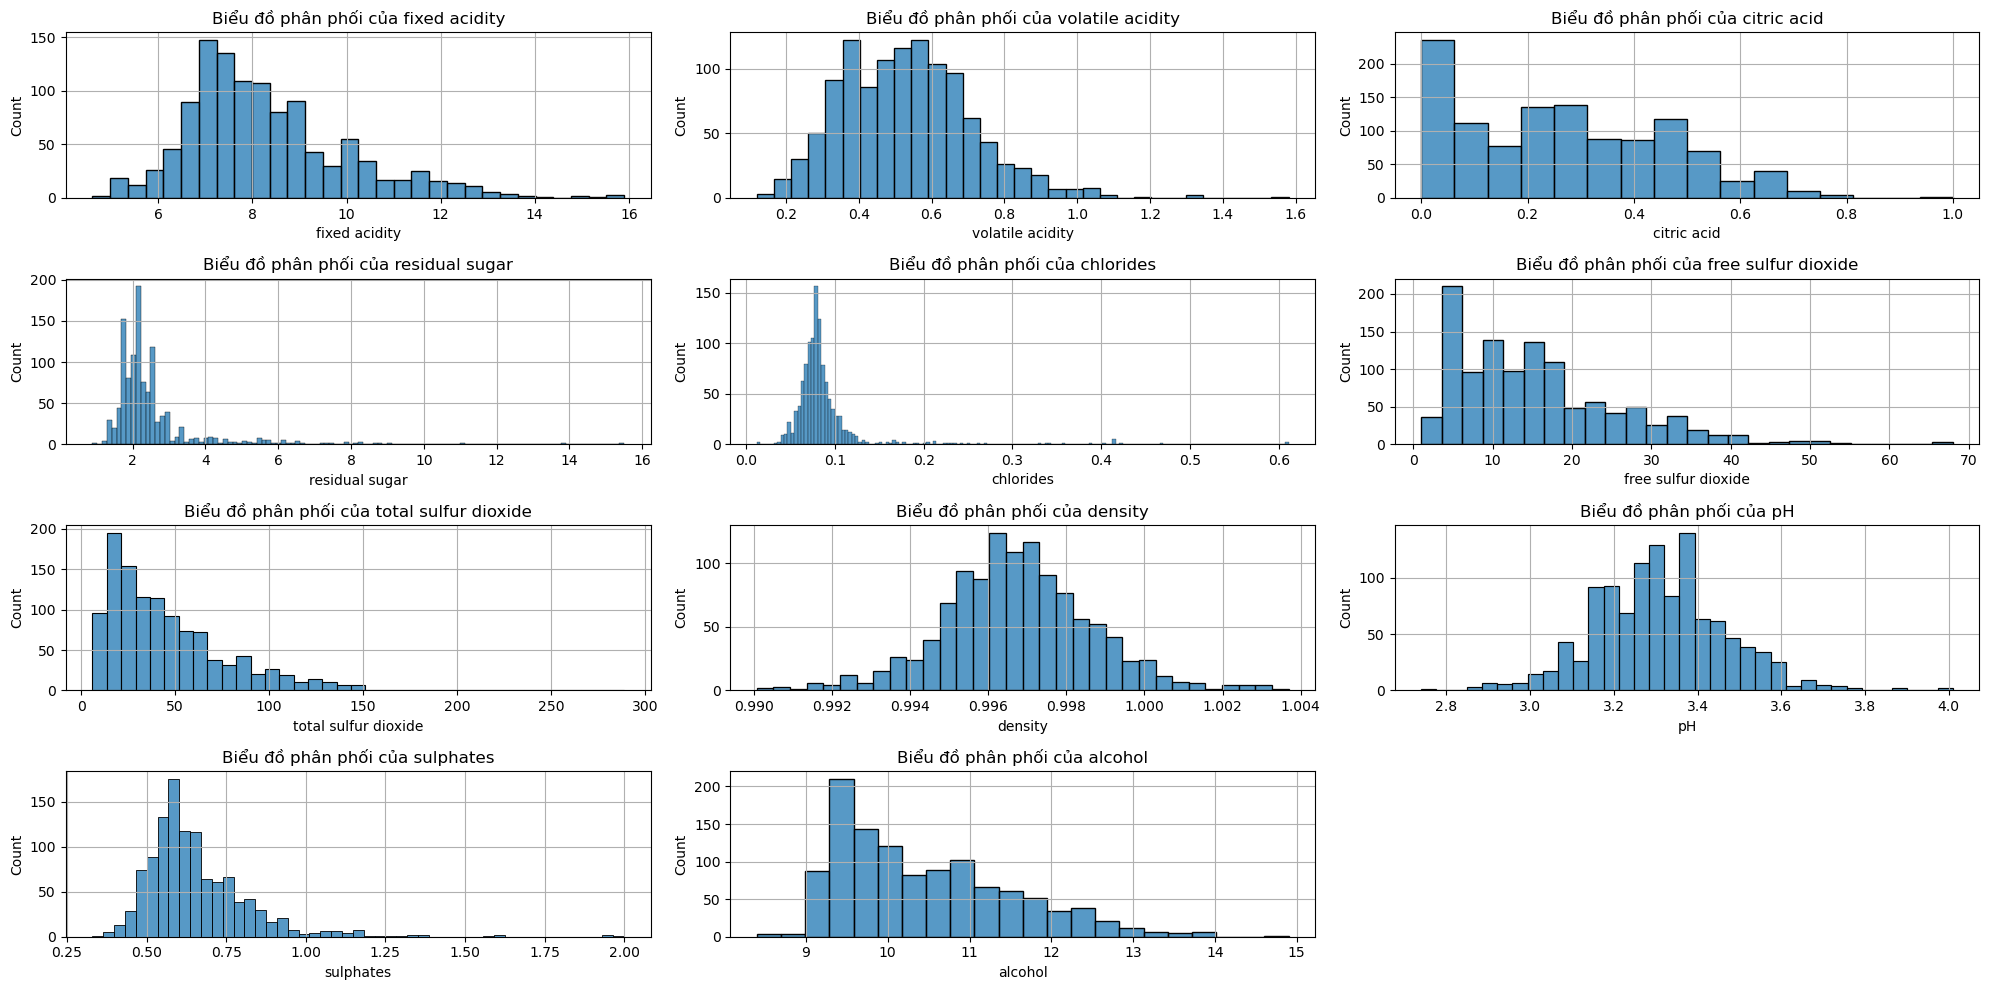

In [139]:
cols = 3 
if len(feature) % cols != 0 : 
    rows = len(feature) // cols + 1
else : 
    rows = len(feature) //cols
fig , axe = plt.subplots(rows , cols , figsize = (20,10))
for y in range(rows):
    for x in range(cols):
        if y * cols + x >=11 : 
            axe[y, x].axis('off')
            break 
        else : 
            axes = axe[y , x]
            X = df.loc[: , feature[y*cols+x]]
            sns.histplot(X , ax = axes)
            title = feature[y*cols +x]
            axes.set_title(f'Biểu đồ phân phối của {title}')
            axes.grid()
plt.tight_layout()


- Các thuộc tính density và pH có dạng phân phối gần chuẩn.

- Các thuộc tính khác như citric acid, residual sugar, sulphates, chlorides, sulfur dioxide đều lệch phải, có nhiều giá trị thấp và một số ít giá trị cao vượt trội (outlier).

- Điều này phản ánh tính chất hóa học thực tế của rượu vang: phần lớn mẫu có nồng độ chất phụ gia và độ chua ở mức thấp.

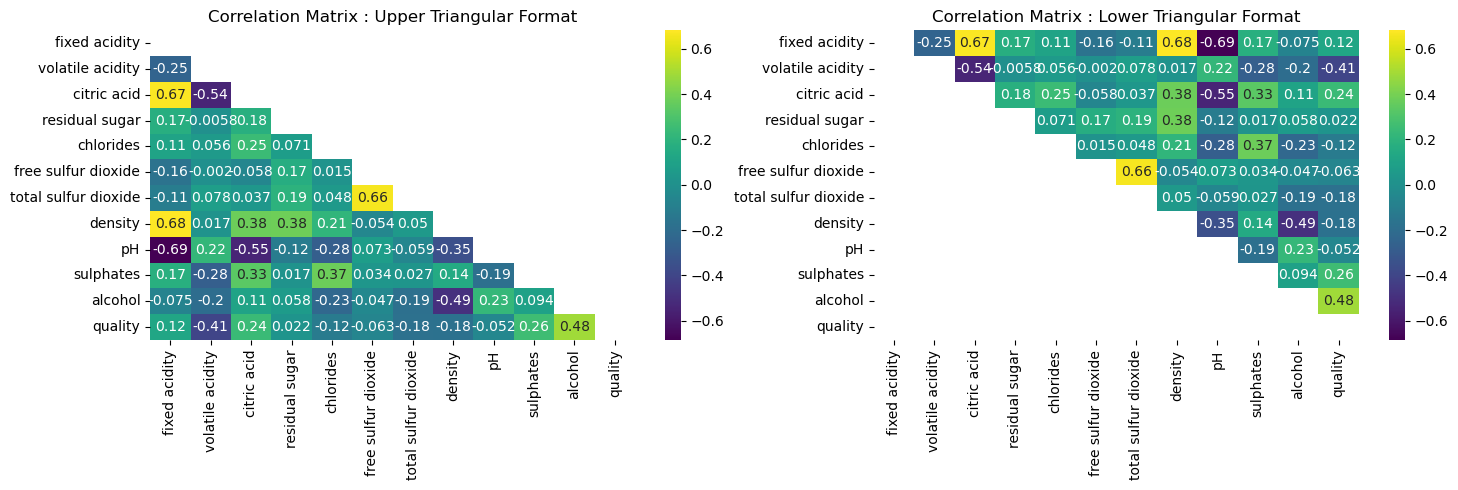

In [140]:
upper_triangle = np.triu(df.corr())
lower_triangle = np.tril(df.corr())

fig , axe = plt.subplots(1,2 , figsize = (15,5))

plt.subplot(1,2,1)
sns.heatmap(df.corr() , cmap = 'viridis' , annot= True , mask = upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')
plt.tight_layout()
plt.subplot(1,2,2)
sns.heatmap(df.corr() , cmap= 'viridis' , annot = True , mask = lower_triangle , cbar = True )
plt.title('Correlation Matrix : Lower Triangular Format')
plt.tight_layout()

- Alcohol có tương quan dương mạnh nhất với quality (rượu có nồng độ cồn cao thì chất lượng thường tốt hơn).

- Volatile acidity tương quan âm khá mạnh (độ chua bay hơi cao → chất lượng giảm).



# Train_Base_Model

In [141]:
df_xuly1 = df.copy(deep= True)
X = df_xuly1.drop('quality' , axis = 1)
y = df_xuly1['quality']

In [142]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler 
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [143]:
mms = MinMaxScaler()
sds = StandardScaler()

X['density'] = sds.fit_transform(X[['density']])
X['pH'] = sds.fit_transform(X[['pH']])

for i in X.columns : 
    if (i != 'density') | (i != 'pH'):
        X[i] = mms.fit_transform(X[[i]])

In [144]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 2 , stratify=y)
models = {
    'RandomForest' : RandomForestClassifier(class_weight='balanced'),
    'Logistic' : LogisticRegression(max_iter= 1000 , class_weight='balanced') , 
    'SVM' : SVC(class_weight='balanced')
}
results = []

for name , model in models.items():
    score = np.mean(cross_val_score(model , X , y , cv = 5 , scoring= 'f1_macro'))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test , y_pred)
    report = classification_report(y_test , y_pred)

    results.append({'model' : name , 'score' : score , 'cm' : cm , 'report' : report})

df_f1 = pd.DataFrame([{'name' : r['model'] , 'score' : r['score']} for r in results])
df_f1 = df_f1.sort_values(by = 'score' , ascending= False , ignore_index= True)

In [147]:
print(results[1]['report'])

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.29      0.12         7
           5       0.64      0.60      0.62        97
           6       0.66      0.21      0.31        92
           7       0.22      0.21      0.21        29
           8       0.03      0.33      0.06         3

    accuracy                           0.38       229
   macro avg       0.27      0.27      0.22       229
weighted avg       0.56      0.38      0.42       229



In [146]:
df_f1

,name,score
0,RandomForest,0.293024
1,SVM,0.260019
2,Logistic,0.219233
